In [1]:
import numpy as np
import pandas as pd
import os
import PIL.Image as Image
import matplotlib.pyplot as plt

### Introduction

The project assigned for our group was to explore data at scale. We were given the opportunity to select and  analyse a large and specific dataset. After picking a method of neural networks to investigate, our challenge was attempting to apply parallel data science technology. The consensus was that the domain in which we would conduct our coding would be on Python. Our decision was to look at MRI brain scans of tumors, investigating the categorising of the images. We located in <a href="https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset">Kaggle</a> a dataset with a separate training set of 5712 images and test set of 1311 images, totaling 158.6MB. This is a combination of images from three different datasets:  <a href="https://figshare.com/articles/dataset/brain_tumor_dataset/1512427">Figshare</a>, <a href="https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri">SARTAJ dataset</a>, <a href="https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection?select=no">Br45H</a>. In this dataset there were four categories: no tumor, Pituitary, Meningioma and Glioma. These sets have sagittal, axial and coronal images so the models would be built so that they can diagnose the brain scan no matter what angle it was taken.  

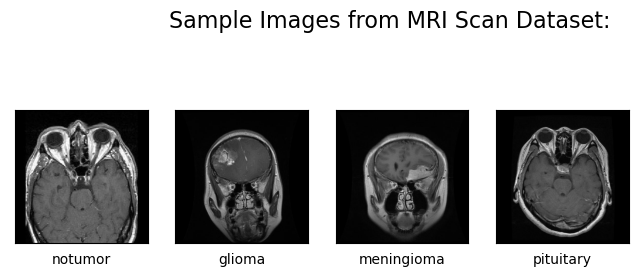

In [2]:
sample_scans = []
mri_scans = "C:/Users/Calvi/Documents/Uni/Tumor/Training/"
diagnosis = ['notumor','glioma','meningioma','pituitary']
for i in range(len(diagnosis)):
    tumor_path_train = os.path.join(mri_scans, diagnosis[i])
    sample_scans.append(np.array(Image.open(os.path.join(tumor_path_train, os.listdir(tumor_path_train)[0]))))
fig = plt.figure(figsize=(10,10))
fig.suptitle("Sample Images from MRI Scan Dataset:", fontsize=16)
for j in range(4):
    plt.subplot(5,5,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample_scans[j], cmap=plt.cm.binary)
    plt.xlabel(diagnosis[j])
plt.show()

Two models were build to be able to predict the diagnosis of the MRI scan. The first was a baseline model and the second was an ResNet-50 model. The ability to accurately predict the classification (and presence) of a brain tumor is very importance as this could save lives in the process, with a serious need for accuracy in predictions as there are disastrous consequences for incorrect predictions. Before we were able to train our models, we look to preprocess the data by augmenting and transforming images to improve the ability of the model to classify unseen data.